## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

We load the dataset and print its first 5 rows

In [2]:
df = pd.read_csv('../data/raw/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
#checking for null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df.shape

(9800, 18)

### Data Cleaning and Preprocessing

Our initial df.info() check revealed a few key areas to address:

Correct Data Types: The Order Date and Ship Date columns are currently stored as object (text). For time series forecasting, we shall convert Order Date into a proper datetime format.

Missing Values: The Postal Code column has some missing values. We'll remove the rows with missing data for now. It's a small number of rows and won't significantly impact our overall analysis.

Unnecessary Columns: The Row ID column is a unique identifier for each row and doesn't provide any analytical value. We will drop it to simplify our DataFrame.


In [6]:
#Convert both 'Order Date' and 'Ship Date' to datetime format
df[['Order Date', 'Ship Date']] = df[['Order Date', 'Ship Date']].apply(pd.to_datetime, format='%d/%m/%Y')

In [7]:
df[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [8]:
# Drop rows with missing values
df.dropna(subset=['Postal Code'], inplace=True)

In [9]:
#drop the Row ID column
df.drop('Row ID', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9789 non-null   object        
 1   Order Date     9789 non-null   datetime64[ns]
 2   Ship Date      9789 non-null   datetime64[ns]
 3   Ship Mode      9789 non-null   object        
 4   Customer ID    9789 non-null   object        
 5   Customer Name  9789 non-null   object        
 6   Segment        9789 non-null   object        
 7   Country        9789 non-null   object        
 8   City           9789 non-null   object        
 9   State          9789 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9789 non-null   object        
 12  Product ID     9789 non-null   object        
 13  Category       9789 non-null   object        
 14  Sub-Category   9789 non-null   object        
 15  Product Name   9789 n

### Step 2: Exploratory Data Analysis (EDA)
 
Next we perform EDA to uncover initial insights. The primary goal is to understand the sales trends, seasonality, and overall distribution.

We will start by plotting the total sales over time. This will help us visualize:

- **Trend:** Is the overall sales volume increasing, decreasing, or stable over the years?  
- **Seasonality:** Are there recurring patterns in sales within a year (e.g., spikes during holidays, dips in summer)?  

To do this, we'll set the `Order Date` as the index of our DataFrame, which simplifies plotting and time-based analysis.


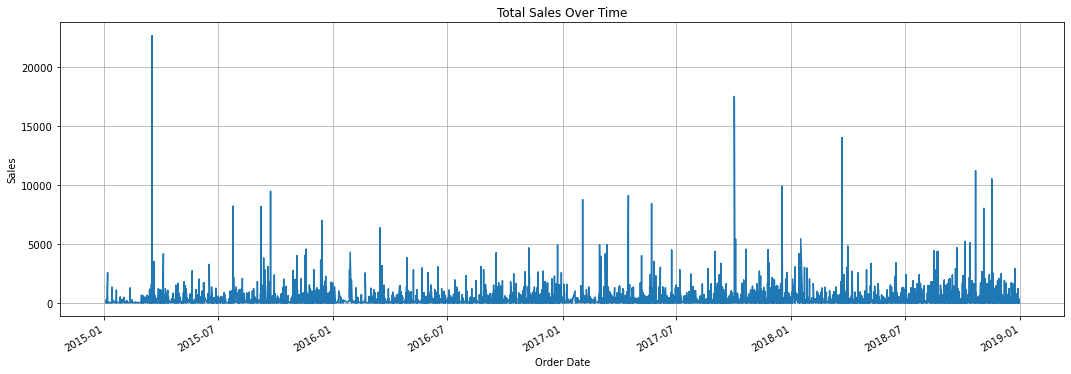

In [11]:
# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Plotting the sales data
plt.figure(figsize=(18, 6))
df['Sales'].plot()
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


#### Observations:

High Volatility: The plot is extremely "spiky" and volatile. This is because we are plotting every single transaction as a point in time. A day with many small sales and one large sale would look very different, making it difficult to discern a pattern.

Lack of Clear Trend: Due to the noise, it's almost impossible to see if sales are generally increasing or decreasing over time.

No Obvious Seasonality: Similarly, any recurring seasonal patterns (like holiday spikes) are drowned out by the daily transaction noise.

To better visualize the trend and seasonality, we will resample our time series data from a daily to a monthly frequency. We'll aggregate the Sales data by taking the sum for each month.

In [12]:
# Resample to monthly frequency, summing the sales,
monthly_sales = df['Sales'].resample('MS').sum()
monthly_sales.head()

Order Date
2015-01-01    14205.707
2015-02-01     4519.892
2015-03-01    55205.797
2015-04-01    27906.855
2015-05-01    23644.303
Freq: MS, Name: Sales, dtype: float64

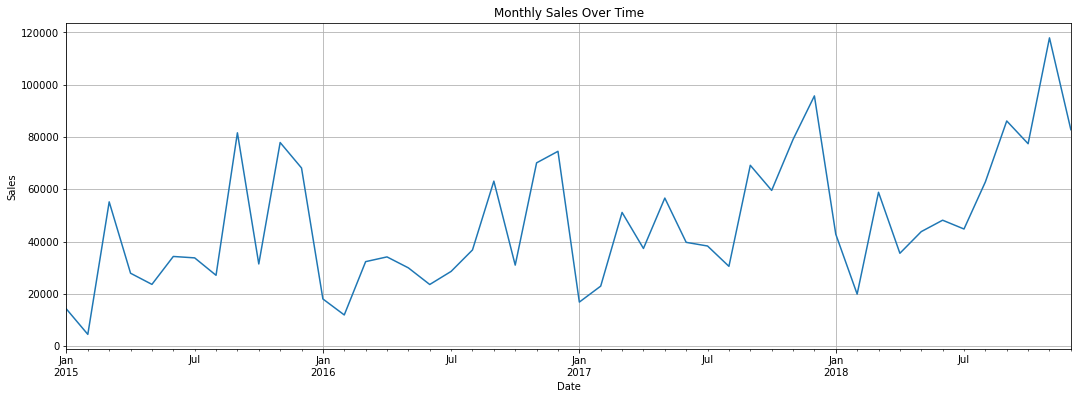

In [13]:
# Plotting the monthly sales data
plt.figure(figsize=(18, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


### Time Series Decomposition

To formally analyze the components of our time series, we can decompose it into three parts:

1. **Trend**: The long-term progression of the series.  
2. **Seasonality**: The repeating short-term cycles in the series.  
3. **Residual**: The random, irregular component left over after removing the trend and seasonality.  

We'll use the `seasonal_decompose` function from the `statsmodels` library to perform this analysis on our monthly sales data.


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive')


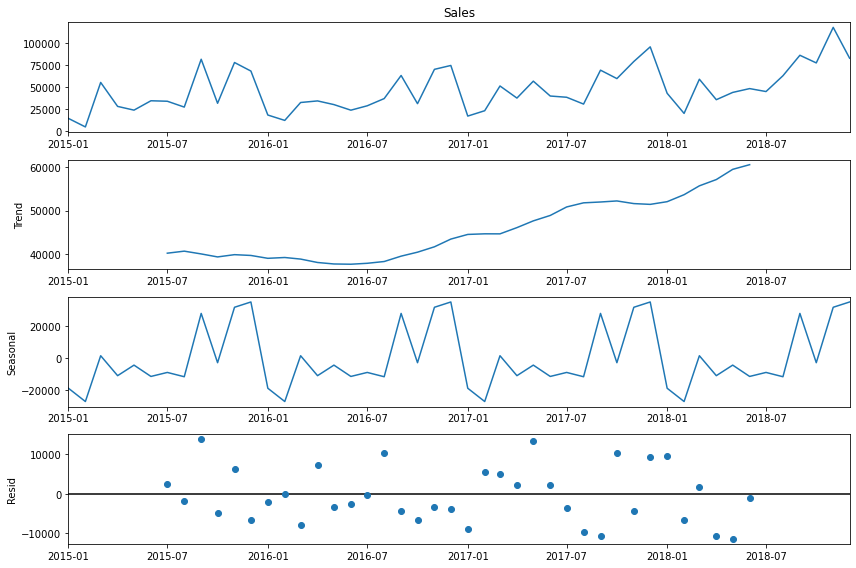

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Set default figure size
plt.rcParams['figure.figsize'] = (12, 8)

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')

# Plot decomposition
fig = decomposition.plot()
plt.show()


The decomposition plot confirms our initial observations:

- **Trend**: The trend component shows a consistent, almost linear increase in sales over the four years.  
- **Seasonal**: The seasonal component clearly shows the annual pattern. Sales peak at the end of the year and are lowest around February.  
- **Residual**: The residuals are the leftover noise after removing the trend and seasonality. They appear to be fairly random, which is good, as it suggests our model has captured the main patterns well.  

### Exploring Sales by Category and Region

Beyond time, it's also useful to understand which product categories, regions, or customer segments are driving sales. This can help in targeted marketing and inventory management. Let's create some bar plots to visualize this.


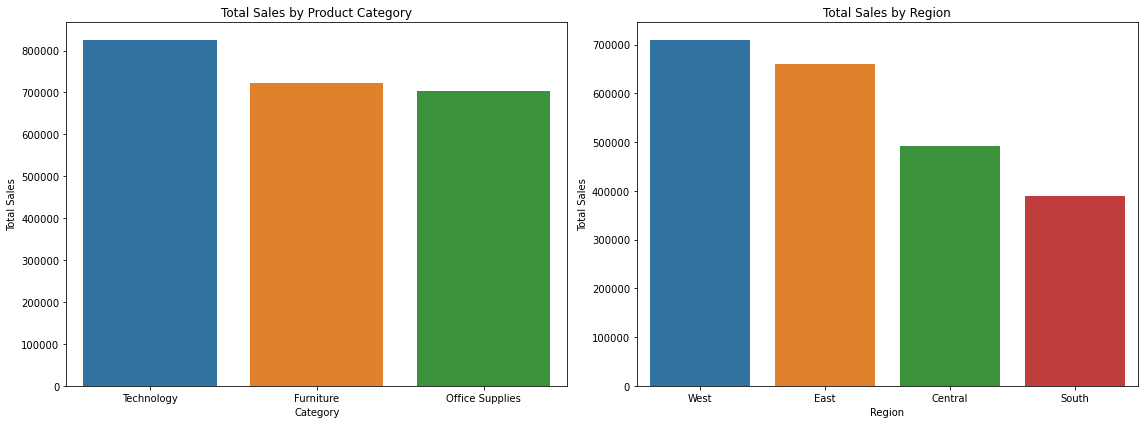

In [16]:
# Group sales by Category and Region
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Sales by Category
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, ax=axes[0])
axes[0].set_title('Total Sales by Product Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')

# Plot Sales by Region
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, ax=axes[1])
axes[1].set_title('Total Sales by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()


From these charts, we can see that:

- **Technology** is the highest-grossing category, followed closely by Furniture and then Office Supplies.  
- The **West** and **East** regions are the top contributors to sales, while the South has the lowest sales.  

This kind of information is crucial for business strategy, helping to decide where to focus marketing efforts or which product lines to expand.


## Sales Forecasting with Prophet

Now we'll move on to the core task: forecasting future sales. We will use Facebook's **Prophet** library, which is powerful and specifically designed for time series forecasting. It's robust to missing data and shifts in the trend, and it typically handles seasonality well.

### Data Preparation for Prophet

Prophet requires the input DataFrame to have a specific format with two columns:  
1. `ds`: The timestamp column (must be datetime).  
2. `y`: The numeric value we want to forecast (in our case, sales).  

We will use our `monthly_sales` data for this.


In [18]:
# Reset index to turn the date index into a column
prophet_df = monthly_sales.reset_index()

# Rename columns to 'ds' and 'y' as required by Prophet
prophet_df.columns = ['ds', 'y']

# Display the first 5 rows of the prepared data
prophet_df.head()


,ds,y
0,2015-01-01,14205.707
1,2015-02-01,4519.892
2,2015-03-01,55205.797
3,2015-04-01,27906.855
4,2015-05-01,23644.303
